# HW2

## Question 1 （Theoretical question）

We now examine the differences between LDA and QDA. 

(a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

In general, as the sample size \textit{n} increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer. 

- A
   - for both the training and testing data sets, we should ecpect that LDA would preform better as it is less flexable and would not overfit the training data and the underlying decision boundry is linear
- B
   - this depends on just how non-linear the DB is as both QDA and LDA could preform just as bad or if the DB is only slightly non-linear , LDA would still be a better choice , but overall QDA would preform better.
- C
   -  we can expect the prediction accuracy of QDA to be improve relative to lda because once we train the LDA model it wont be able to accuratly predict the testing data as well as a more flexible moel can esspecially with a large amount of data 
- D
    - false: even though QDA is more flexible , LDA produces a model that has a very high accuracy albiet take a lot of computational power. also the trade-off between bias and varience QDA has to make will make its error rate higher 

## Question 2 （Theoretical question)

Suppose that we wish to predict whether a given stock will issue a dividend this year (Yes or No) based on $X$, last years percent profit. We examine a large number of companies and discover that the mean value of $X$ for companies that issues a dividend was $\bar{X} = 10$,  while the mean for those that didn't was $\bar{X} = 0$. In addition, the variance of $X$ for these two sets of companies was $\hat{\sigma}^2 = 36$. Finally, $80\%$ of companies issued dividends. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year.


here its useful to use the density of a random normal variable function

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$
and from here we can use bayes theorem and this function in conjuction to find the P(divided givien | X=4)

In [3]:
import math as mt
pi1 = .8
mean1 = 10 
pi2 = .2
mean2 = 0
vari = 36
x = 4

predictedprob = ( pi1*mt.exp(-1*((1/72)*(x - mean1))**2) )/( (pi1 * mt.exp(-1*((1/72)*(x - mean1))**2))+(pi2 *mt.exp(-1*((1/72)*(x - mean2))**2)) )
predictedprob

0.7993820015399294

## Question 3 （Theoretical question)

Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

1. We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary. 

Ans: because we are interested in knowing more about what affect CEO saleries, thats like saying we are iterested in the data generating process, and we want to use a model to do this. This would be inference with n ==500 p = 3



2. We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

Ans: "we wish to know" is the same as saying that we want to predict whether or not the product will succede, we want to do ths with a classification model of some sort with a n =20 and p = 13

3. We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

Ans: we want to predict usd/euro exchange rates using some other markets as predictors. we need to first determine if these other variables influence or affect the dependent variable. we can gain this insight through regression and inference, however the main concern is with predicting exchange rates. this has more to do with prediction where n = 52 and p = 3


## Default Data set 
*Source: ISRL package*
We first introduce a simulated `Default` data set. A simulated data set containing information on ten thousand customers. The aim here is to predict which customers will default on their credit card debt. 

Columns: 
* `default`: A factor with levels No and Yes indicating whether the customer defaulted on their debt
* `student`: A factor with levels No and Yes indicating whether the customer is a student. 
* `balance`: The average balance that the customer has remaining on their credit card after making their monthly payment
* `income`: Income of customer

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as lm
import sklearn.linear_model as LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')

## The  Logistic Sigmoid Function

Text(0.5, 1.0, 'Logistic (sigmoid)')

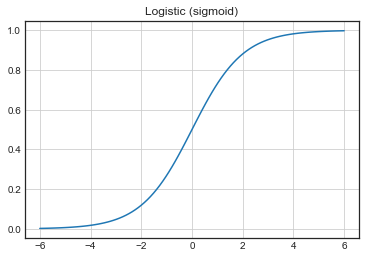

In [5]:
def logistic(x): return 1 / (1 + np.exp(-x))
x = np.linspace(-6, 6, 100)
plt.plot(x, logistic(x)) 
plt.grid(True) 
plt.title('Logistic (sigmoid)')

## Q4. Compare the performance of linear regression and logistic regression to predict the probability that default = Yes using X = balance.

In [6]:
Default = pd.read_csv("/Users/arturovillalobos/STAT_files/HOMEWORK/hw2/Defualt.csv")
default = Default.values[:,1]
Balance = Default.values[:,3]
Income  = Default.values[:,4]
Y       = Default.default.factorize()[0]

## Q4(a). Use all the data set as training but creat $Xtest = [min(balance), max(balance)]$

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [8]:
X_train = Balance.reshape(-1,1) 
y_train = Y
X_test = np.arange(Balance.min(), Balance.max()).reshape(-1,1)

## Q4(b). Fit a linear regression on training data 

In [9]:
model_lin = LinearRegression()
model_lin.fit(X_train,y_train)
prob_lin = model_lin.predict(X_test)

## Q4(c). Fit a logistic regression on training data

In [10]:
model_log = LogisticRegression(solver='newton-cg')
model_log.fit(X_train,y_train)
prob_log = model_log.predict_proba(X_test)

## Q4.(d) Plot side by side the Logistic and Linear Regression

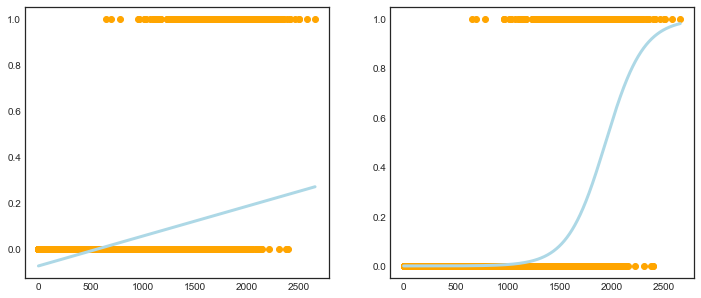

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
ax1.scatter(X_train, y_train, color='orange')
ax1.plot(X_test, prob_lin, color='lightblue', linewidth = 3)
# Right plot
ax2.scatter(X_train, y_train, color='orange')
ax2.plot(X_test, prob_log[:,1], color='lightblue', linewidth = 3)

## Q4.(e) Write down the Decision Boundary for the Logistic Regression above. 
## if  we classify the dafault status for log odds > 0.5 as "Yes"  and for log odds < 0.5 as "No". And show it in the graph. 

Answer :   Logistic Decsion Boundary  $\log(p(x)/1-p(x))$ = $ \beta_0 + \beta_1*X$

In [12]:
model_log.coef_,model_log.intercept_ #gives the intercepts of the linear equ

(array([[0.00549892]]), array([-10.65133019]))

## Notes/ Questions
i am confused by this , if these are indeed the coefficient and intercept when p(x) = .5 then the plot of (Balance, -10.65133019+ 0.00549892*balance) should produce the decision boundry because it is at these values where the linear protion of the equation is equal to zero but as you can see below it seems wildly off to me . any help / note from grading would be really helpful even thoguh i know its not technically your responsibility

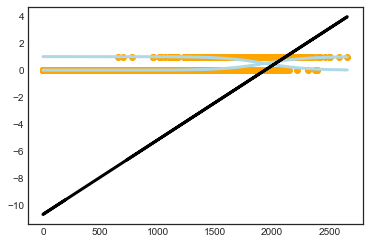

In [13]:

plt.scatter(X_train,y_train, color='orange')
plt.plot(X_test, prob_log, color='lightblue', linewidth = 3)
plt.plot(Balance, -10.65133019+ 0.00549892*Balance, color='black', linewidth = 3)

## Q5.(a) Simulation Set up

1. Generate from a two dimensional predictors from two groups with $f_1(X) = \mathcal{N}\left(\left[
 \begin{matrix}
   0\\ -1
  \end{matrix} 
\right], \left[
 \begin{matrix}
   1 & 0.8\\ 0.8 & 1
  \end{matrix} 
\right]\right)$ and $f_1(X)\sim \mathcal{N}\left(\left[
 \begin{matrix}
   0\\ 1
  \end{matrix} 
\right], \left[
 \begin{matrix}
   1 & 0.8\\ 0.8 & 1
  \end{matrix} 
\right]\right)$

2. The prior of each class $\pi_1 = \pi_2 = 0.5$

3. For X coming from group 1, set Y = 1 and X coming from group 2, set Y = 2. 

4. Generate 100 samples each group.

In [14]:
n_samples, n_features = 100, 2
mean1, mean2 = np.array([0, -1]), np.array([0, 1])
Cov = np.array([[1, .8],[.8, 1]])
np.random.seed(42)
X1 = np.random.multivariate_normal(mean1, Cov, n_samples)
X2 = np.random.multivariate_normal(mean2, Cov, n_samples)
X  = np.vstack([X1, X2])
y  = np.array([1] * X1.shape[0] + [2] * X2.shape[0])

### Split the data into trianing and testing using 80-20 rule

In [15]:
#libraries
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state = 2)

### Scale the data before LDA and QDA.

In [16]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


model_lda = LDA(store_covariance=True)
model_lda.fit(X_train, y_train)
predict_lda = model_lda.predict(X_test)
error_lda = 1 - accuracy_score(y_test, predict_lda)

model_qda = QDA()
model_qda.fit(X_train, y_train)
predict_qda = model_qda.predict(X_test)
error_qda = 1- accuracy_score(y_test, predict_qda)

In [18]:
model_log = LogisticRegression(solver='newton-cg')
model_log.fit(X_train, y_train)
predict_log = model_log.predict(X_test)
#error_matrix = confusion_matrix(y_test, predict_log)
#error_matrix
error_log = 1- accuracy_score(y_test, predict_log)

## Q5(c). Find all the parameters estimates for the Decision Boundaries of LDA and Logistic Regression

In [19]:
model_log.intercept_, model_log.coef_

(array([0.11680137]), array([[-2.2381119 ,  3.52243935]]))

Logistic Decision Boundary: here it should be the same as before where we the DB should be when p(x) = .5 and $\log(p(x)/1-p(x))$ = $ \beta_0 + \beta_1*X + \beta_2*X_2$

In [20]:
slopes = np.linalg.inv(model_lda.covariance_).dot(model_lda.means_[0,] - model_lda.means_[1,])
slopes[0], slopes[1]

(4.370293173087681, -6.799892717422216)

In [21]:
intercept = 0.5*model_lda.means_[0,].dot(np.linalg.inv(model_lda.covariance_).dot(model_lda.means_[0,])) 
- 0.5*model_lda.means_[1,].dot(np.linalg.inv(model_lda.covariance_).dot(model_lda.means_[1,]))

-1.2050031104517434

Answer : LDA Decision Boundary :   0 = a + $X^T$ * B 
- Where:
    - a = $\log(\pi_k/\pi_l) - 1/2 *(\mu_k - \mu_l)^T\Sigma^-1(\mu_k-\mu_l)$
    - b = $ \Sigma^-1 * (\mu_k-\mu_l)$

In [22]:

model_lda.intercept_,model_lda.coef_ , model_lda.priors_

(array([0.3637822]),
 array([[-4.31566451,  6.71489406]]),
 array([0.475, 0.525]))

In [25]:
X[0:99]

array([[-0.42750141, -1.51494743],
       [-1.09607563, -1.13282697],
       [ 0.296178  , -0.85190321],
       [-1.74085699, -2.25548865],
       [ 0.27380996, -0.38304494],
       [ 0.5869133 , -0.70764005],
       [ 0.37548677, -1.8345779 ],
       [ 1.81421167,  0.45858981],
       [ 0.86148224,  0.0602297 ],
       [ 1.30803692, -0.58518237],
       [-1.31903977, -2.46183324],
       [ 0.38648206, -1.51460782],
       [ 0.48137   , -0.4484764 ],
       [ 0.97312224,  0.21073453],
       [ 0.66205756, -0.52242577],
       [-0.01491278,  0.15657081],
       [ 0.34728216, -1.32167297],
       [-0.39426996, -2.16639928],
       [ 0.4215567 , -1.81784751],
       [ 1.19777493,  0.32228091],
       [-0.75476232, -1.6463795 ],
       [ 0.20493094, -0.98550376],
       [ 1.63028384,  0.17501439],
       [ 0.10270891, -0.22870829],
       [ 0.23153732, -1.88350718],
       [-0.18567934, -1.42922676],
       [ 0.44875557, -0.16438638],
       [-1.27258866, -1.6835954 ],
       [ 0.89393319,

## Q5(d). Plot the Decision Boundaries along with the data for LDA on the $X_1$ and $X_2$ Axis. With Y = 1 as blue and Y2 =2 as orange.  

ValueError: operands could not be broadcast together with shapes (2,) (10,) 

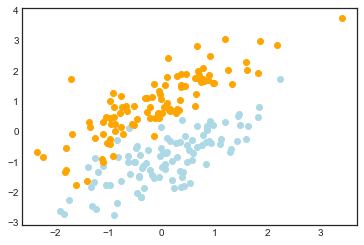

In [107]:

plt.scatter(X[0:99,0],X[0:99,1] , color='lightblue')
plt.scatter(X[100:199,0],X[100:199,1] , color='orange')
# Plot the LDA boundary  
x1_lda = np.linspace(-3, 4, 10)
x2_lda =  0.3637822 + (np.linalg.inv(model_lda.covariance_).dot(model_lda.means_[0,] - model_lda.means_[1,]))*x1_lda
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x1_lda, x2_lda, color='black', linewidth = 3)





## Q5.(e) Find the Bayes Error Rate using the simulation you have done in the lab and compare that with the error of logistic , LDA and QDA.

In [26]:
model_lda.covariance_

array([[0.96501355, 0.56513102],
       [0.56513102, 0.55881561]])

In [108]:
from scipy.stats import multivariate_normal

### Calculate the Bayes Error RATE 
value     = np.ones(len(y_test))
for i in np.arange(len(y_test)):
    p1    = multivariate_normal.pdf(X_test[i,], mean1, Cov)
    p2    = multivariate_normal.pdf(X_test[i,], mean2, Cov)
    value = np.append(value, np.maximum(p1/(p1+p2),p2/(p1+p2))) 

In [109]:
1 - np.mean(value)

0.03594556686399708

In [110]:
error_lda

0.0

In [111]:
error_qda

0.0

In [112]:
error_log

0.0

### Resoning for a 0.0 error in all three models
    - because all errors wheere calculated by using 1- accuracy score means that if we where to make a confusion matrix for all three models we would find that 3 models would have only diagonals in their matrix
    

In [114]:
error_matrixlog = confusion_matrix(y_test, predict_log)
error_matrixlda = confusion_matrix(y_test, predict_lda)
error_matrixqda = confusion_matrix(y_test, predict_qda)

In [115]:
error_matrixlog,error_matrixlda,error_matrixqda

(array([[24,  0],
        [ 0, 16]]),
 array([[24,  0],
        [ 0, 16]]),
 array([[24,  0],
        [ 0, 16]]))